# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Nur Ichsan Budiyanto]
- **Email:** [nur.ichsan.budiyanto@mail.ugm.ac.id]
- **ID Dicoding:** [nichsanb]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan dan apa saja faktor yang berpengaruh pada perubahan tren sepanjang tahun?
- Bagaimana pola musiman penyewaan sepeda membantu *decision-making* persedian sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

## Data Wrangling

### Gathering Data

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load data day

day = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
# Load data hour

hour = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hour.csv')
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

*Assesing* Dataset day

In [6]:
# Mengetahui jumlah kolom dan baris data day

baris, kolom = day.shape
print(f"jumlah baris:{baris}")
print(f"jumlah kolom:{kolom}")

jumlah baris:731
jumlah kolom:16


In [7]:
# Mengetahui struktur dan konten dataset day

day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
# Mengetahui jumlah missing value dataset day

day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# Mengetahui jumlah data duplikat dataset day

day.duplicated().sum()

0

In [10]:
day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [11]:
day.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

*Assesing* Dataset hour

In [12]:
# Mengetahui jumlah kolom dan baris data hour

baris, kolom = hour.shape
print(f"jumlah baris:{baris}")
print(f"jumlah kolom:{kolom}")

jumlah baris:17379
jumlah kolom:17


In [13]:
# Mengetahui struktur dan konten dataset hour

hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [14]:
# Mengetahui jumlah missing value dataset hour

hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [15]:
# Mengetahui jumlah data duplikat dataset hour

hour.duplicated().sum()

0

In [16]:
hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [17]:
hour.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

### Cleaning Data

*Cleaning* Dataset day

In [18]:
# Mengubah tipe data kolom 'dteday' menjadi datetime dan
# Mengubah kolom 'instant' menjadi kolom indeks

day_cleaned = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/day.csv",
                          index_col="instant", parse_dates=["dteday"])
day_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 91.4 KB


*Cleaning* Dataset hour

In [19]:
# Mengubah tipe data kolom 'dteday' menjadi datetime dan
# Mengubah kolom 'instant' menjadi kolom indeks

hour_cleaned = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/hour.csv",
                          index_col="instant", parse_dates=["dteday"])
hour_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

## Exploratory Data Analysis (EDA)

### Explore ...

day EDA

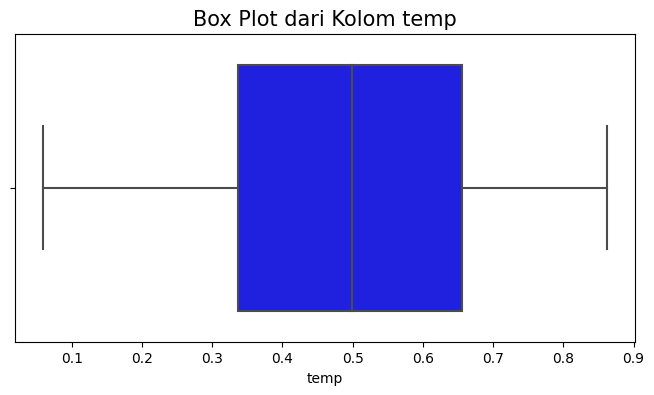

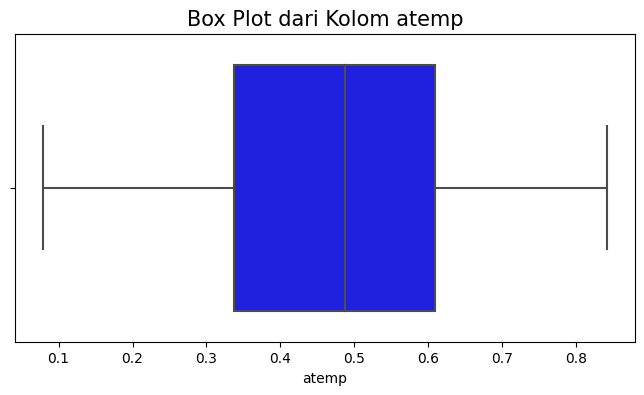

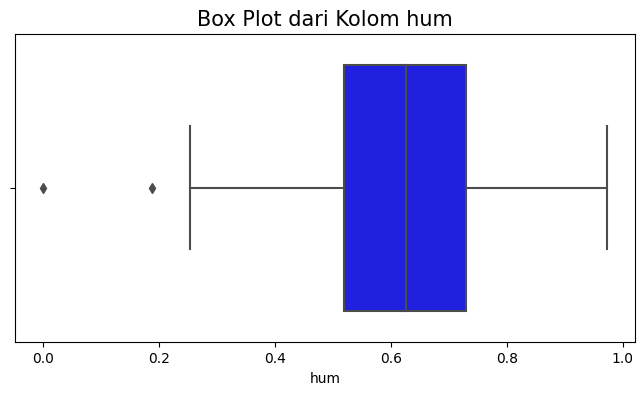

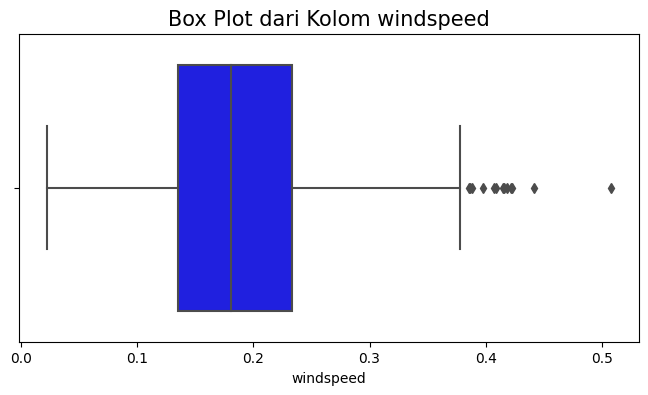

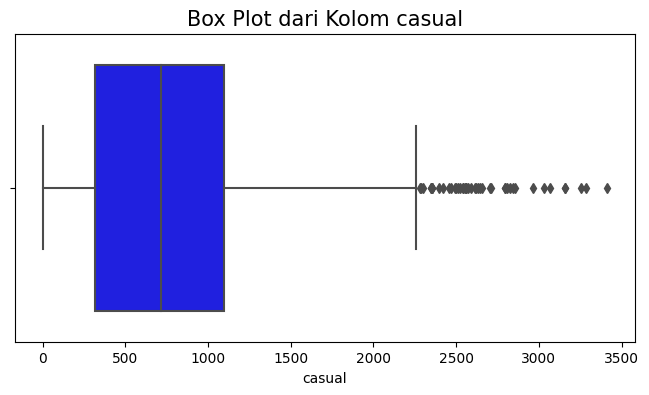

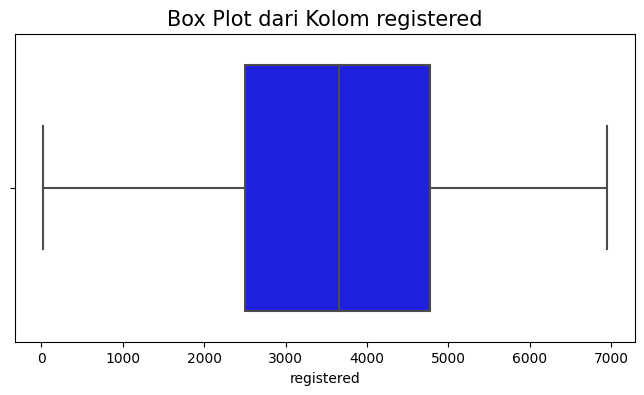

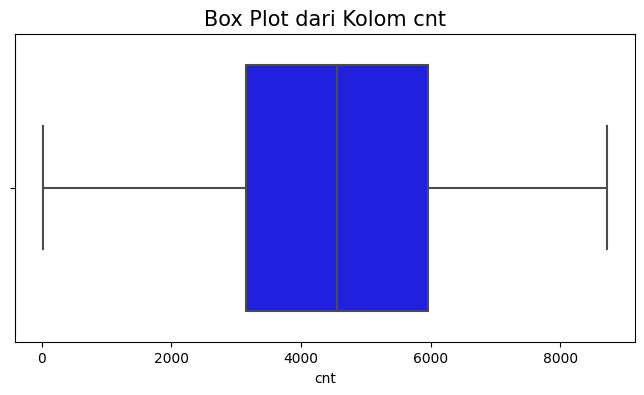

In [20]:
# Membuat box plot untuk mengidentifikasi outlier dan mengetahui sebaran data
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
                   'cnt']

# Membuat box plot untuk setiap kolom numerik
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=day_cleaned, x=column, color='blue')
    plt.title(f'Box Plot dari Kolom {column}', fontsize = 15)
    plt.show()

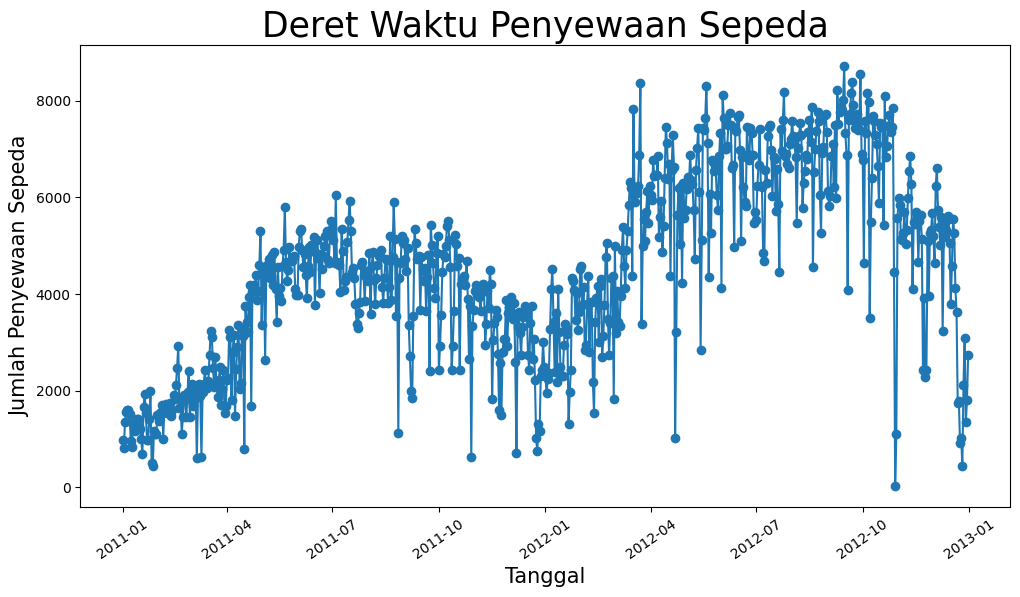

In [21]:
# Membuat Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(day_cleaned['dteday'], day_cleaned['cnt'], marker='o', linestyle='-')
plt.title('Deret Waktu Penyewaan Sepeda', fontsize = 25)
plt.xlabel('Tanggal', fontsize = 15)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize = 15)
plt.xticks(rotation=35)
plt.show()

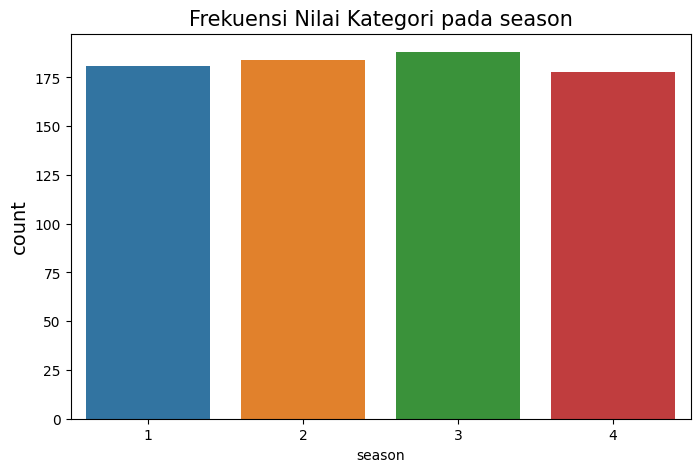

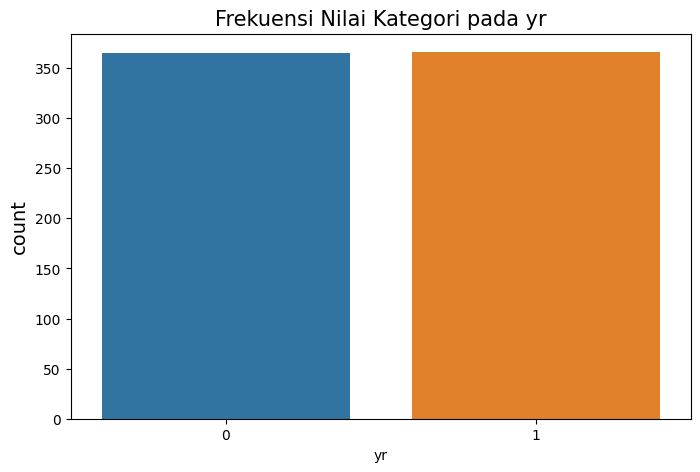

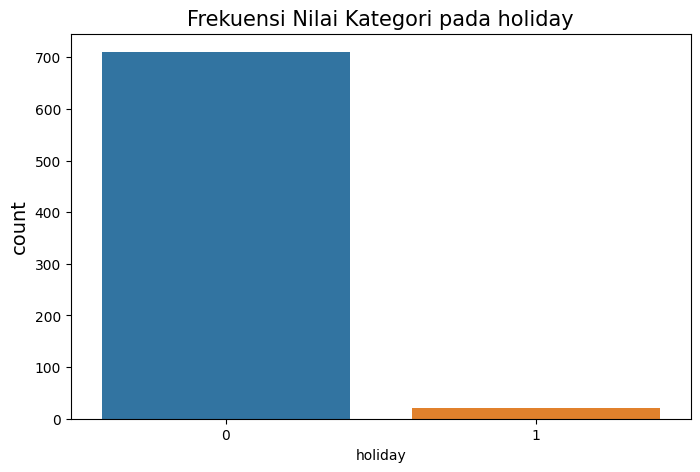

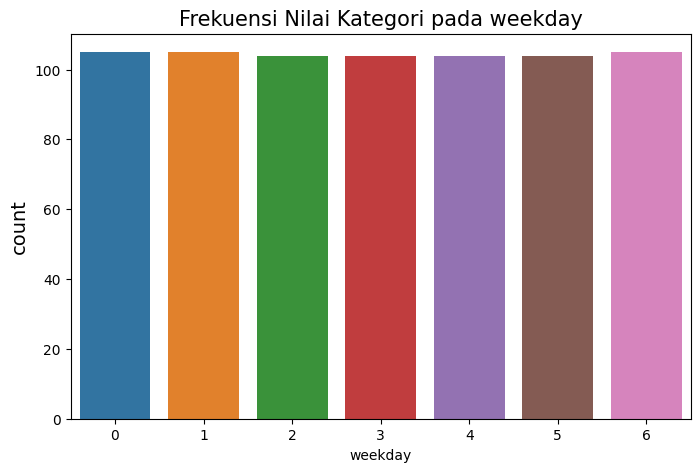

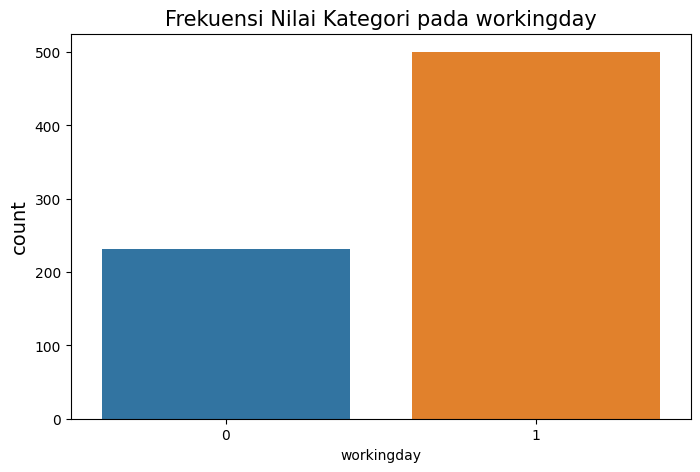

In [22]:
# Kolom kategorikal yang ingin dieksplorasi
categorical_vars = ['season', 'yr', 'holiday', 'weekday', 'workingday']

# Plot kolom kategorikal pada day_cleaned
for var in categorical_vars:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=day_cleaned, x=var)
    plt.title(f'Frekuensi Nilai Kategori pada {var}', fontsize = 15)
    plt.ylabel('count', fontsize = 14)
    plt.show()

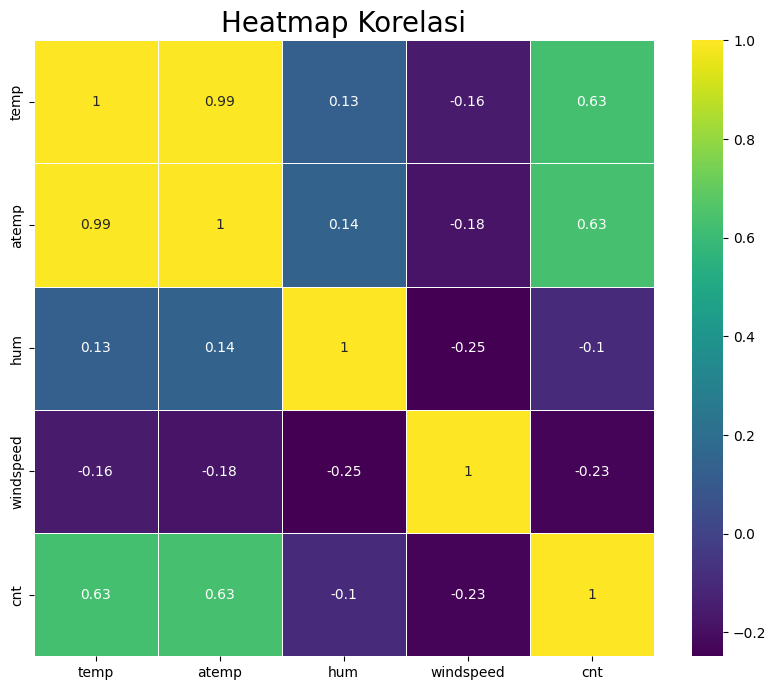

In [23]:
# Mengetahui nilai matriks korelasi
correlation_matrix = day_cleaned[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=.5)
plt.title('Heatmap Korelasi', fontsize = 20)
plt.show()

hour EDA

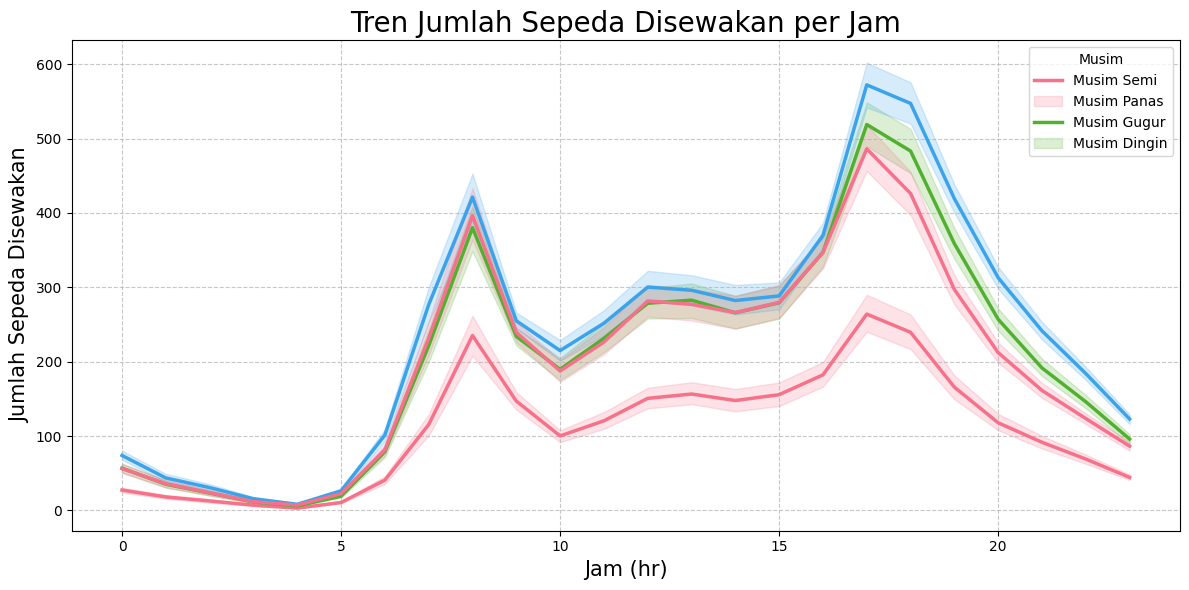

In [24]:
# Plot time series untuk mengetahui pola data waktu berdasarkan jam
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_cleaned, x='hr', y='cnt', hue='season', palette='husl', linewidth=2.5)
plt.title('Tren Jumlah Sepeda Disewakan per Jam', fontsize = 20)
plt.xlabel('Jam (hr)', fontsize = 15)
plt.ylabel('Jumlah Sepeda Disewakan',fontsize = 15)
plt.legend(title='Musim', loc='upper right', labels=['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Visualization & Explanatory Analysis

### **Pertanyaan 1**: Bagaimana tren penyewaan dan apa saja faktor yang berpengaruh pada perubahan tren sepanjang tahun?

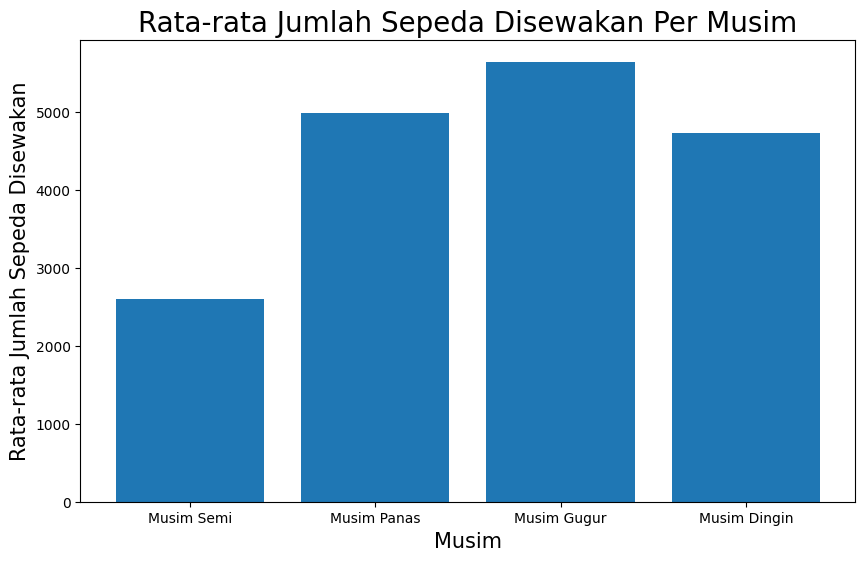

In [26]:
# Mengelompokan data berdasar musim dan mencari rata-rata jumlah sepeda disewakan
data_per_musim = day_cleaned.groupby('season')['cnt'].mean()

# Membuat kamus untuk mendefinisikan musim berdasarkan kode
nama_musim = {
    1: "Musim Semi",
    2: "Musim Panas",
    3: "Musim Gugur",
    4: "Musim Dingin"
}
# Membuat plot bar rata-rata jumlah sepeda yang disewakan setiap musim
plt.figure(figsize=(10, 6))
plt.bar(nama_musim.values(), data_per_musim.values)
plt.title('Rata-rata Jumlah Sepeda Disewakan Per Musim', fontsize = 20)
plt.xlabel('Musim', fontsize = 15)
plt.ylabel('Rata-rata Jumlah Sepeda Disewakan', fontsize = 15)
plt.show()

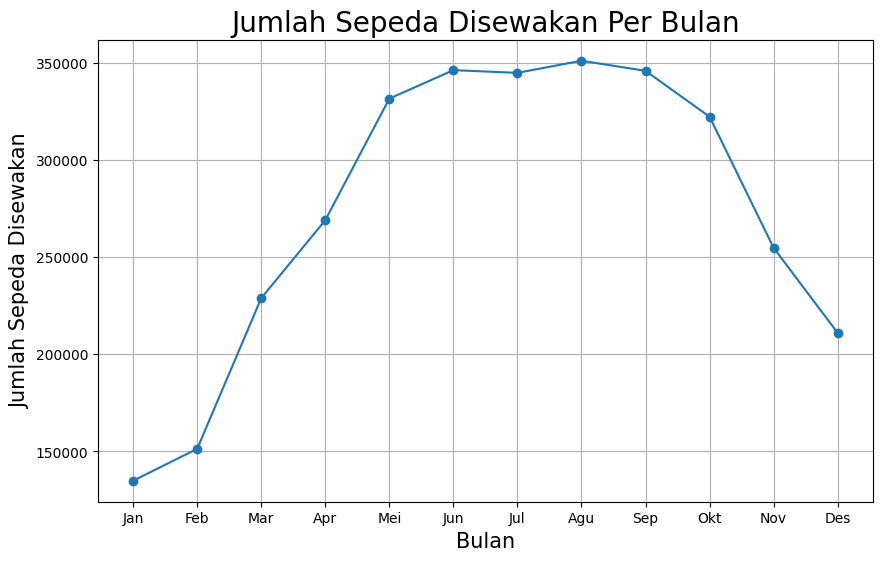

In [27]:
# Mengelompokkan data berdasarkan bulan (kolom 'mnth') dan mencari jumlah sepeda disewakan per bulan
data_per_bulan = day_cleaned.groupby('mnth')['cnt'].sum()

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(data_per_bulan.index, data_per_bulan.values, marker='o', linestyle='-')
plt.title('Jumlah Sepeda Disewakan Per Bulan', fontsize = 20)
plt.xlabel('Bulan', fontsize = 15)
plt.ylabel('Jumlah Sepeda Disewakan', fontsize = 15)
plt.grid(True)
plt.xticks(data_per_bulan.index, ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.show()


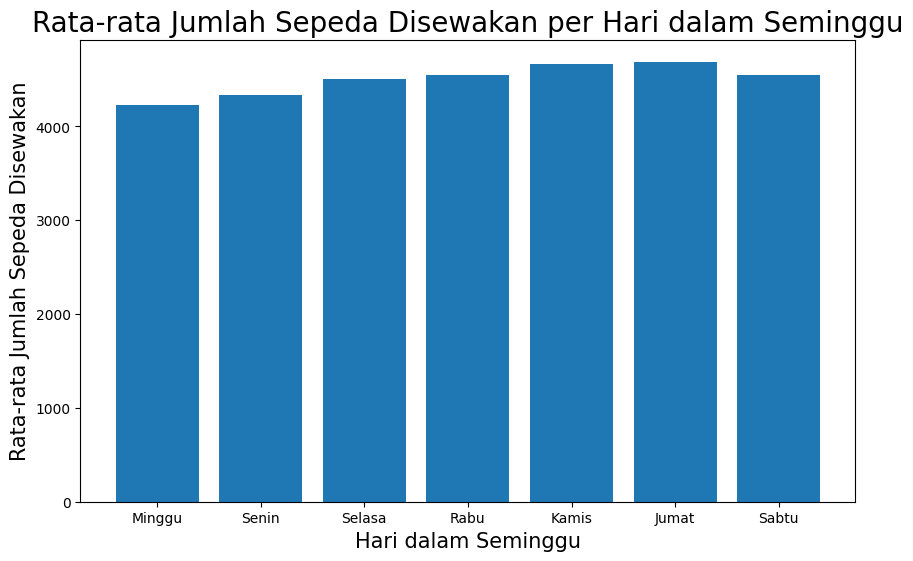

In [28]:
# Mengelompokkan data berdasarkan hari dalam seminggu dan mencari rata-rata
# jumlah sepeda disewakan per hari
data_per_hari = day_cleaned.groupby('weekday')['cnt'].mean()

# Membuat plot bar untuk rata-rata jumlah sepeda disewakan per hari dalam seminggu
nama_hari = ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu']

plt.figure(figsize=(10, 6))
plt.bar(nama_hari, data_per_hari.values)
plt.title('Rata-rata Jumlah Sepeda Disewakan per Hari dalam Seminggu', fontsize = 20)
plt.xlabel('Hari dalam Seminggu', fontsize = 15)
plt.ylabel('Rata-rata Jumlah Sepeda Disewakan', fontsize = 15)
plt.show()

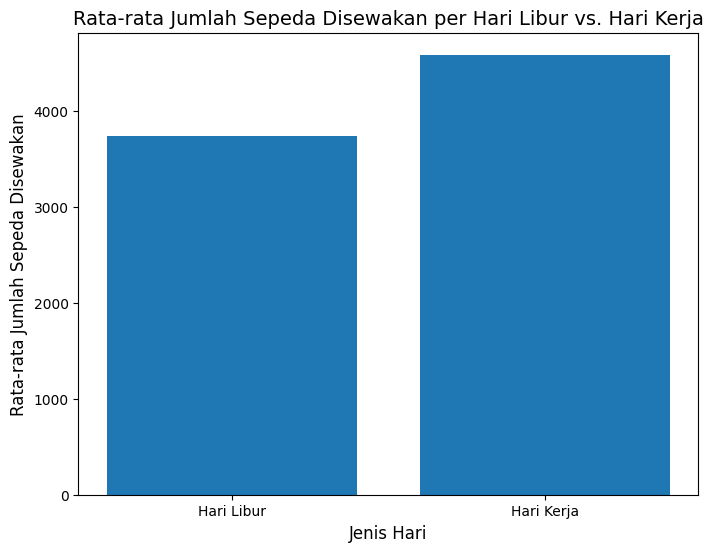

In [31]:
# Mengelompokkan data berdasarkan hari libur atau hari kerja
# dan menghitung rata-rata jumlah sepeda disewakan
data_hari_libur = day_cleaned[day_cleaned['holiday'] == 1]['cnt'].mean()
data_hari_kerja = day_cleaned[day_cleaned['workingday'] == 1]['cnt'].mean()

# Membuat plot bar untuk rata-rata jumlah sepeda disewakan per hari libur vs. hari kerja
plt.figure(figsize=(8, 6))
plt.bar(['Hari Libur', 'Hari Kerja'], [data_hari_libur, data_hari_kerja])
plt.title('Rata-rata Jumlah Sepeda Disewakan per Hari Libur vs. Hari Kerja', fontsize = 14)
plt.xlabel('Jenis Hari', fontsize = 12)
plt.ylabel('Rata-rata Jumlah Sepeda Disewakan', fontsize = 12)
plt.show()

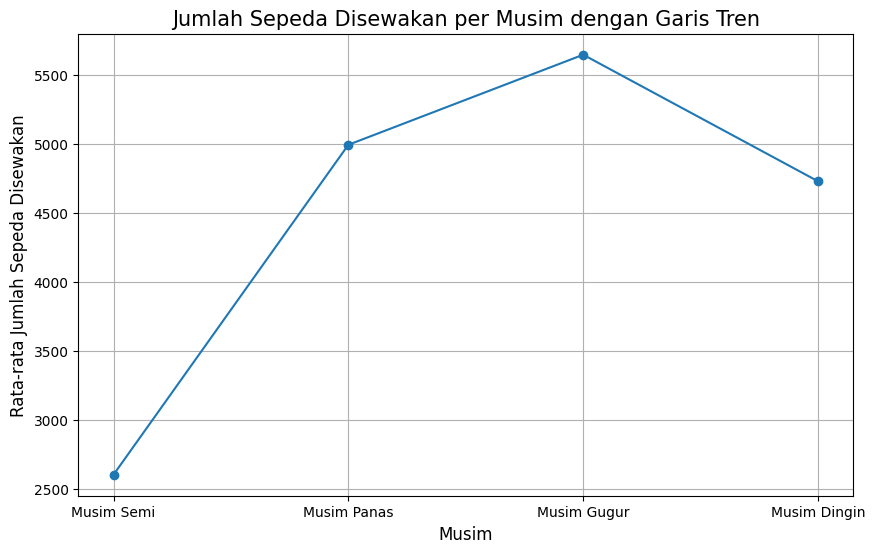

In [32]:
# Mengelompokkan data berdasarkan musim dan mencari rata-rata jumlah sepeda disewakan per musim
data_per_musim = day_cleaned.groupby('season')['cnt'].mean()

# Membuat plot dengan garis tren
plt.figure(figsize=(10, 6))
plt.plot(data_per_musim.index, data_per_musim.values, marker='o', linestyle='-')
plt.title('Jumlah Sepeda Disewakan per Musim dengan Garis Tren', fontsize = 15)
plt.xlabel('Musim', fontsize = 12)
plt.ylabel('Rata-rata Jumlah Sepeda Disewakan', fontsize = 12)
plt.grid(True)
plt.xticks(data_per_musim.index, ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.show()

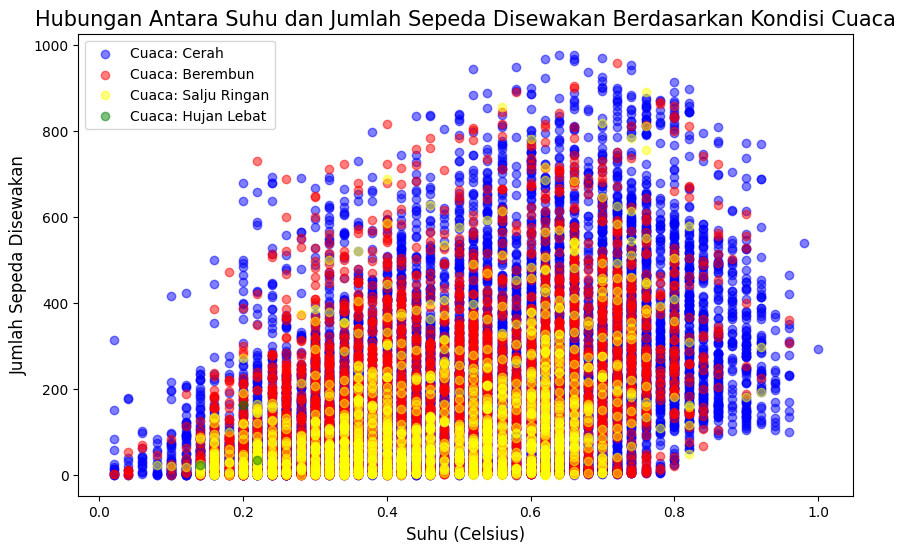

In [39]:
# Scatter plot untuk hubungan antara suhu 'temp' dengan jumlah sepeda disewakan 'cnt' berdasar kondisi cuaca 'weathersit'
plt.figure(figsize=(10, 6))
colors = ['blue', 'red', 'yellow', 'green']

for weathersit in hour_cleaned['weathersit'].unique():
    subset = hour_cleaned[hour_cleaned['weathersit'] == weathersit]
    if weathersit == 1:
        label = 'Cerah'
    elif weathersit == 2:
        label = 'Berembun'
    elif weathersit == 3:
        label = 'Salju Ringan'
    else:
        label = 'Hujan Lebat'
    plt.scatter(subset['temp'], subset['cnt'], alpha=0.5, label=f'Cuaca: {label}', color=colors[weathersit - 1])

plt.title('Hubungan Antara Suhu dan Jumlah Sepeda Disewakan Berdasarkan Kondisi Cuaca', fontsize = 15)
plt.xlabel('Suhu (Celsius)', fontsize = 12)
plt.ylabel('Jumlah Sepeda Disewakan', fontsize = 12)
plt.legend()
plt.show()

### **Pertanyaan 2**: Bagaimana pola musiman penyewaan sepeda membantu decision-making persedian sepeda?

In [41]:
# Menunjukan hasil analisis musiman
for musim, rata_rata in data_per_musim.items():
    print(f"{nama_musim[musim]}: Rata-Rata Jumlah Sepeda Disewakan = {round(rata_rata, 2)}")

Musim Semi: Rata-Rata Jumlah Sepeda Disewakan = 2604.13
Musim Panas: Rata-Rata Jumlah Sepeda Disewakan = 4992.33
Musim Gugur: Rata-Rata Jumlah Sepeda Disewakan = 5644.3
Musim Dingin: Rata-Rata Jumlah Sepeda Disewakan = 4728.16


In [42]:
# Menunjukan rata-rata jumlah sepeda disewakan per bulan
data_per_bulan_mean = day_cleaned.groupby('mnth')['cnt'].mean()
print("Rata-Rata Jumlah Sepeda Disewakan Per Bulan:")
print(data_per_bulan_mean)

Rata-Rata Jumlah Sepeda Disewakan Per Bulan:
mnth
1     2176.338710
2     2655.298246
3     3692.258065
4     4484.900000
5     5349.774194
6     5772.366667
7     5563.677419
8     5664.419355
9     5766.516667
10    5199.225806
11    4247.183333
12    3403.806452
Name: cnt, dtype: float64


In [43]:
# Menunjukan hasil rata-rata jumlah sepeda disewakan per hari dalam seminggu
print("Rata-Rata Jumlah Sepeda Disewakan Per Hari dalam Seminggu:")
print(data_per_hari)

Rata-Rata Jumlah Sepeda Disewakan Per Hari dalam Seminggu:
weekday
0    4228.828571
1    4338.123810
2    4510.663462
3    4548.538462
4    4667.259615
5    4690.288462
6    4550.542857
Name: cnt, dtype: float64


## Conclusion

**Conclusion Pertanyaan 1** :
*Bagaimana tren penyewaan dan apa saja faktor yang berpengaruh pada perubahan tren sepanjang tahun?*

*   Pola atau tren penyewaan sepeda menunjukan perubahan yang signifikan, tren menunjukan peningkatan dari musim semi hingga musim gugur puncak penyewaan tertinggi, dan mulai mengalami penurunan pada musim dingin.
*   Pada hari kerja, penyewaan sepeda cenderung menunjukan jumlah yang lebih tinggi daripada hari libur.
*   Cuaca, musim, dan suhu merupakan faktor kuat yang sangat mempengaruhi tren penyewaan sepeda.



**Conclusion Pertanyaan 2** :
*Bagaimana pola musiman penyewaan sepeda membantu decision-making persedian sepeda?*

A. Pola Harian
- Musim Semi: Rata-Rata Jumlah Sepeda Disewakan = 2604.13
- Musim Panas: Rata-Rata Jumlah Sepeda Disewakan = 4992.33
- Musim Gugur: Rata-Rata Jumlah Sepeda Disewakan = 5644.3
- Musim Dingin: Rata-Rata Jumlah Sepeda Disewakan = 4728.16

B. Pola Musiman
- Hari Kerja (*Weekday*): Rata-Rata Jumlah Sepeda Disewakan = 4584.82
- Hari Libur (*Weekend*): Rata-Rata Jumlah Sepeda Disewakan = 3735.0

C. Implikasi
- Pada hari kerja, peminjaman sepeda lebih banyak terjadi dibandingkan dengan hari libur. Fakta ini menunjukkan peluang bisnis potensial pada hari-hari kerja, dan perusahaan sebaiknya mempertimbangkan strategi pemasaran dan promosi khusus untuk menarik pelanggan selama periode tersebut.
- Selama musim panas dan musim gugur, tingkat permintaan sepeda mencapai puncaknya. Oleh karena itu, diperlukan peningkatan strategi persediaan sepeda untuk memastikan ketersediaan yang memadai selama periode dengan permintaan tinggi ini.
- Analisis pola musiman memberikan wawasan berharga dalam perencanaan persediaan sepeda, memungkinkan perusahaan untuk mengoptimalkan manajemen inventaris mereka. Pendekatan ini dapat mencegah ketidakseimbangan antara permintaan dan persediaan, yang pada gilirannya dapat meningkatkan kepuasan pelanggan dan efisiensi operasional.
